<a href="https://colab.research.google.com/github/Kishan-Sinha/Annual_Tea_Yield_Predictor/blob/main/Tea_Model_Training.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# importing necesssary libraries

import pandas as pd
import numpy as np

# importing ML model

from sklearn.linear_model import LogisticRegression

In [ ]:
# Reading the file

df = pd.read_csv('/content/sample_data/processed_tea_data (1).csv')

df

,Yield,leafs p/a_scaled
0,2145.0,0.120724
1,2678.0,0.774517
2,1979.0,-0.082835
3,2086.0,0.049788
4,1650.0,-0.486172
...,...,...
195,2407.0,0.441878
196,2075.0,0.035582
197,2531.0,0.594662
198,1523.0,-0.641567


In [ ]:
# separating the input variables (X) and target column (y)

X = df.drop('Yield', axis=1)

y = df['Yield']

In [ ]:
# Conducting train test split

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=37)

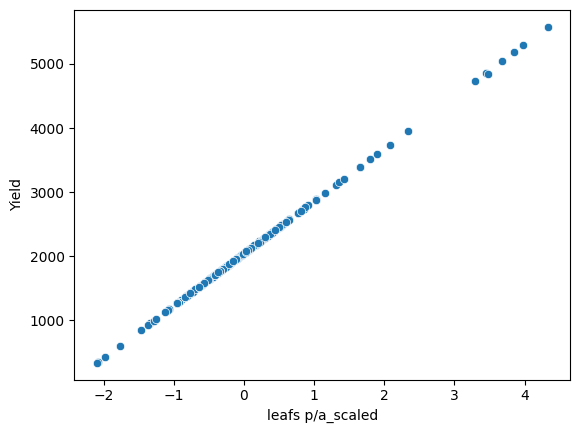

In [ ]:
# Realising the relation between the two variables

import matplotlib.pyplot as plt
import seaborn as sns

sns.scatterplot(x=df['leafs p/a_scaled'], y=df['Yield'])
plt.show()

**As it is evident from the above image that the realtion between the input and target variable can be considered completely linear. Hence we will use LINEAR REGRESSION for predictive analysis**

In [ ]:
# Calling the model

from sklearn.linear_model import LinearRegression

# using ensemble techniques for better generalization

from sklearn.ensemble import BaggingRegressor

# Base model: Linear Regression

base_model = LinearRegression(fit_intercept=True)

# Ensemble model: Bagging Regressor

bagged_model = BaggingRegressor(
                                  estimator=base_model,
                                  n_estimators=30,
                                  random_state=42
                                 )

bagged_model.fit(X_train, y_train)

# keeping a copy of predicted values for further evaluation

y_pred = bagged_model.predict(X_test)

# Checking the score

bagged_model.score(X_test, y_test)

0.9999925702032827

**The accuracy of the model on the test dataset is exceptionally high !!!**

In [ ]:
# Saving the final model

import joblib

joblib.dump(bagged_model, "Tea_output_model.pkl")

['Tea_output_model.pkl']

**The above saved model will be used for predictive analysis**